# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | It is embarrassing to have th...
1,✅ Trip Verified | Flight cancelled due to bad ...
2,✅ Trip Verified | British Airways oversold my...
3,✅ Trip Verified | I travelled London to Doha ...
4,✅ Trip Verified | When dropping off my luggag...


In [4]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("BA_reviews.csv")

In [7]:
df.head()

,Unnamed: 0,reviews
0,0,Not Verified | It is embarrassing to have th...
1,1,✅ Trip Verified | Flight cancelled due to bad ...
2,2,✅ Trip Verified | British Airways oversold my...
3,3,✅ Trip Verified | I travelled London to Doha ...
4,4,✅ Trip Verified | When dropping off my luggag...


In [8]:
df.columns

Index(['Unnamed: 0', 'reviews'], dtype='object')

In [9]:
review_df = df.drop("Unnamed: 0",axis=1)

In [10]:
review_df

,reviews
0,Not Verified | It is embarrassing to have th...
1,✅ Trip Verified | Flight cancelled due to bad ...
2,✅ Trip Verified | British Airways oversold my...
3,✅ Trip Verified | I travelled London to Doha ...
4,✅ Trip Verified | When dropping off my luggag...
...,...
995,✅ Trip Verified | Just checked in for a flight...
996,✅ Trip Verified | Gatwick to Madrid. When I a...
997,✅ Trip Verified | My boyfriend and I wanted t...
998,✅ Trip Verified | I had kept my laptop bag in...


In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [12]:
import re
import nltk
from nltk.corpus import stopwords

In [13]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a914525\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Define a function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

In [15]:
# Apply the clean_text function to the content column
review_df['cleaned_content'] = review_df['reviews'].apply(clean_text)

In [16]:
# Generate a word cloud
text = ' '.join(review_df['cleaned_content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

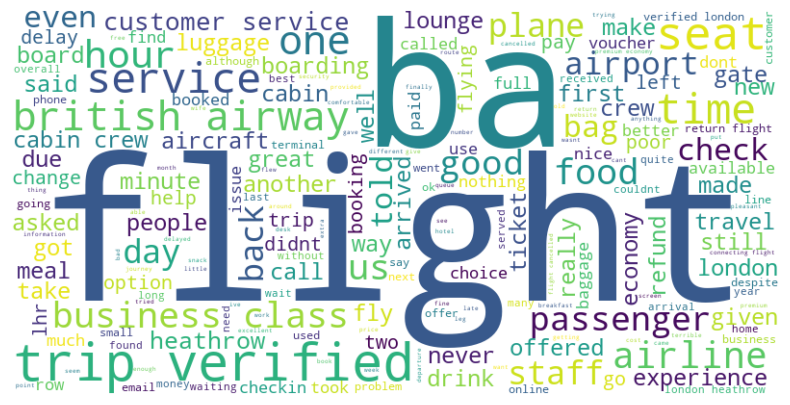

In [17]:
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
# Perform sentiment analysis
# For simplicity, we can use a basic approach based on word frequency
positive_words = ['good', 'great', 'excellent', 'best', 'amazing', 'wonderful']
negative_words = ['bad', 'worst', 'terrible', 'awful', 'poor', 'horrible']

In [19]:
review_df['positive_count'] = review_df['cleaned_content'].apply(lambda x: sum(word in x for word in positive_words))
review_df['negative_count'] = review_df['cleaned_content'].apply(lambda x: sum(word in x for word in negative_words))
review_df['sentiment'] = review_df.apply(lambda row: 'positive' if row['positive_count'] > row['negative_count'] else 'negative', axis=1)

In [20]:
# Display sentiment distribution
print(review_df['sentiment'].value_counts())

sentiment
negative    691
positive    309
Name: count, dtype: int64


In [21]:
# Perform topic modeling
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(review_df['cleaned_content'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [22]:
# Display topics
for index, topic in enumerate(lda.components_):
    print(f'Topic #{index + 1}:')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print()

Topic #1:
['airways', 'airline', 'airport', 'flights', 'london', 'cancelled', 'trip', 'hours', 'ba', 'flight']

Topic #2:
['crew', 'heathrow', 'london', 'boarding', 'service', 'luggage', 'trip', 'ba', 'flight', 'staff']

Topic #3:
['london', 'hours', 'airways', 'customer', 'told', 'service', 'british', 'trip', 'ba', 'flight']

Topic #4:
['service', 'crew', 'business', 'seat', 'food', 'good', 'trip', 'class', 'ba', 'flight']

Topic #5:
['seats', 'seat', 'london', 'check', 'staff', 'time', 'service', 'trip', 'flight', 'ba']



Named Entity Recognition (NER)

In [24]:
!pip install spacy

In [25]:
from spacy import spacy

OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\a914525\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.

In [23]:
import spacy

# Load the pre-trained model
nlp = spacy.load('en_core_web_sm')

# Apply NER
review_df['entities'] = review_df['cleaned_content'].apply(lambda x: [(ent.text, ent.label_) for ent in nlp(x).ents])

review_df[['reviews', 'entities']].head()

OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\a914525\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.

In [ ]:
# POS Tagging
# Apply POS tagging
review_df['pos_tags'] = review_df['cleaned_content'].apply(lambda x: [(token.text, token.pos_) for token in nlp(x)])
review_df[['reviews', 'pos_tags']].head()

In [ ]:
# Apply summarization using sumy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
nltk.download('punkt')

In [ ]:
def summarize_text(text, sentences_count=3):
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, sentences_count)
    return ' '.join([str(sentence) for sentence in summary])

In [ ]:
review_df['summary'] = review_df['cleaned_content'].apply(lambda x: summarize_text(x, sentences_count=3) if len(x.split()) > 50 else x)
review_df[['reviews', 'summary']].head()

In [ ]:
!pip install torch

In [ ]:
# Emotion Detection
from transformers import pipeline
# Load the emotion detection pipeline
emotion_pipeline = pipeline('sentiment-analysis', model='j-hartmann/emotion-english-distilroberta-base')
# Apply emotion detection
review_df['emotions'] = review_df['cleaned_content'].apply(lambda x: emotion_pipeline(x))
review_df[['reviews', 'emotions']].head()